In [1]:
# Temorarily add source code path
import sys
import os
sys.path.insert(0, os.path.realpath('../'))

In [11]:
# Standard imports
import pandas as pd
import numpy as np
import requests
from helpers import *
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from io import StringIO

%matplotlib inline

In [3]:
# Create NSE Object
from market import Market
from nse import NSE
nse = NSE()

In [7]:
returns = nse.get_symbol_eod_values(index='nifty_50')
returns = returns['2016'] * 100

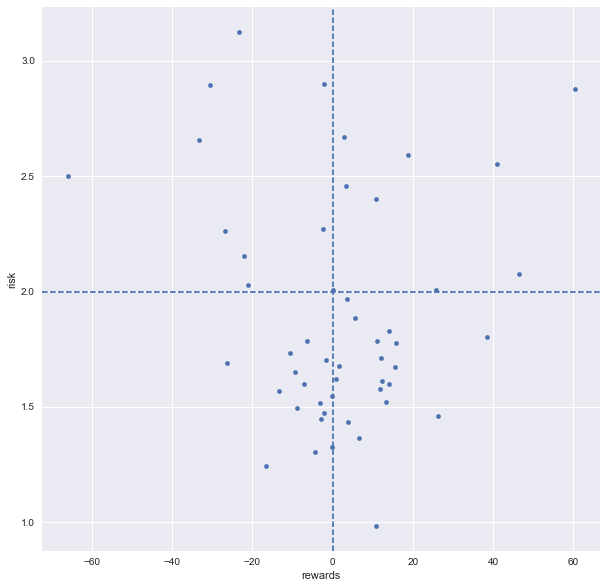

In [22]:
rewards = pd.DataFrame(returns.sum().rename('rewards'))
risk = pd.DataFrame(returns.std().rename('risk'))
risk_reward = rewards.join(risk)
risk_reward = risk_reward.join(nse.symbol_meta['industry'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.axhline(y=2, linestyle='dashed')
plt.axvline(x=0, linestyle='dashed')
risk_reward.plot(kind='scatter', x='rewards', y='risk', ax=ax)

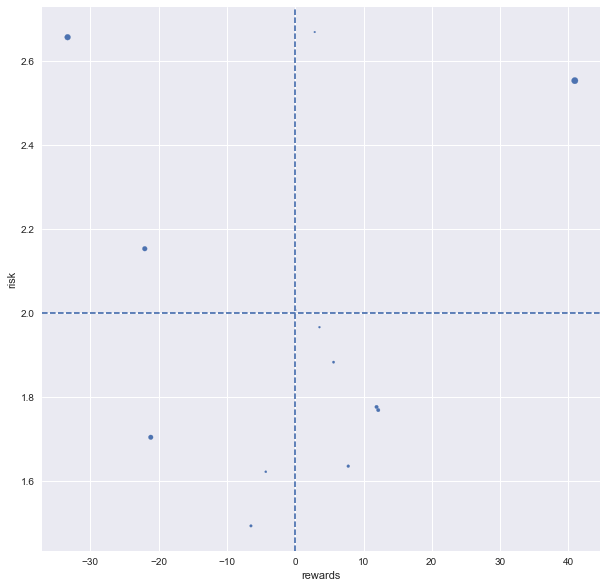

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.axhline(y=2, linestyle='dashed')
plt.axvline(x=0, linestyle='dashed')
industry_risk_reward = risk_reward.groupby('industry').median()
industry_risk_reward.plot(kind='scatter', x='rewards', y='risk', s=np.abs(industry_risk_reward.rewards),ax=ax)